# Context-free grammars with NLTK

NLTK defines a lot of classes that are useful for working with natural language. Here we look at how to work with context-free grammars in NLTK.

## Reading a grammar from a string (or file) and accessing its rules

In [1]:
import nltk

In [2]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [3]:
groucho_grammar

<Grammar with 13 productions>

In [4]:
type(groucho_grammar)

nltk.grammar.CFG

In [5]:
groucho_grammar.start()

S

In [6]:
groucho_grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [7]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N, NP -> Det N PP, NP -> 'I']

In [8]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N, NP -> Det N PP]

In [9]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [10]:
pp[0].lhs()

NP

In [11]:
pp[0].rhs()

(Det, N)

## Parsing

NLTK comes with pre-implemented parsers for CFGs. Parsing a sentence with a CFG returns a list of parse trees. We can either look at their string representations or have the trees drawn graphically.

In [12]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [13]:
print(trees[0])

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


In [14]:
type(trees[0])

nltk.tree.Tree

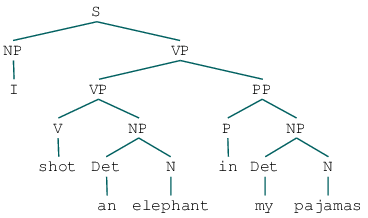

In [15]:
trees[0]

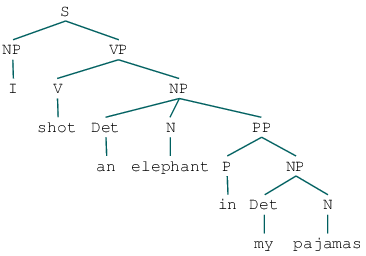

In [16]:
trees[1]